アンサンブル用シート

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')

In [16]:
average_result = []
average_result = pd.DataFrame(average_result)

LGBM_GBDT_result = pd.read_csv('../data/result_data/GBDT_cv_result.csv')
LGBM_DART_result = pd.read_csv('../data/result_data/DART_cv_result.csv')
LGBM_GOSS_result = pd.read_csv('../data/result_data/GOSS_cv_result.csv')
XGB_GBDT_result = pd.read_csv('../data/result_data/XGB_cv_result.csv')
XGB_DART_result = pd.read_csv('../data/result_data/XGB_DART_result.csv')
#CatBoost_result = pd.read_csv('../data/result_data/CatBoost_cv_result.csv')

average_result = (LGBM_GBDT_result['0'] + LGBM_DART_result['0']+ LGBM_GOSS_result['0'] + XGB_GBDT_result['0'] + XGB_DART_result['0'])/5
average_result.reset_index()

,index,0
0,0,129235.328687
1,1,119591.700117
2,2,75028.944664
3,3,54646.112898
4,4,107402.635074
...,...,...
31257,31257,109598.861804
31258,31258,99070.428900
31259,31259,174349.379503
31260,31260,267258.410964


In [17]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
average_result = pd.concat([id, average_result],axis=1)
average_result.to_csv('../data/result_data/average_result.csv',index=False)

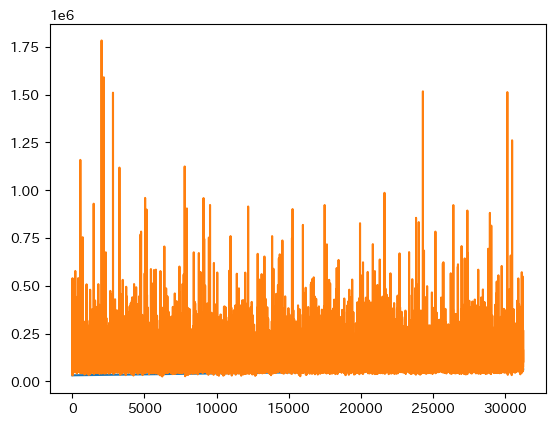

In [4]:
plt.plot(average_result)

In [18]:
corr = pd.concat([LGBM_GBDT_result['0'], LGBM_DART_result['0'], LGBM_GOSS_result['0'], XGB_GBDT_result['0'] , XGB_DART_result['0']], axis=1)
corr.corr()

,0,0,0,0,0
0,1.000000,0.991445,0.992637,0.987369,0.984567
0,0.991445,1.000000,0.990790,0.988618,0.985022
0,0.992637,0.990790,1.000000,0.990274,0.988030
0,0.987369,0.988618,0.990274,1.000000,0.993116
0,0.984567,0.985022,0.988030,0.993116,1.000000


単純な平均ではなく、重みつけを行う！

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')


In [7]:
average_result = []
average_result = pd.DataFrame(average_result)

LGBM_GBDT_result = pd.read_csv('../data/result_data/GBDT_cv_result.csv')
LGBM_DART_result = pd.read_csv('../data/result_data/DART_cv_result.csv')
LGBM_GOSS_result = pd.read_csv('../data/result_data/GOSS_cv_result.csv')
XGB_GBDT_result = pd.read_csv('../data/result_data/XGB_cv_result.csv')
XGB_DART_result = pd.read_csv('../data/result_data/XGB_DART_result.csv')
CatBoost_result = pd.read_csv('../data/result_data/CatBoost_cv_result.csv')

# GBDT = 16784
# DART = 16749
# GOSS = 16837
# XGB =  16594
# CatBoost = 18269
# total = GBDT + DART + GOSS + XGB + CatBoost
# precise_rank = [GBDT, DART, GOSS, XGB, CatBoost]
# precise_rank = np.sort(precise_rank)

# ex_average_result = LGBM_GBDT_result['0']*1.5/10 + LGBM_DART_result['0']*2.5/10+ LGBM_GOSS_result['0']*1.5/10 + XGB_GBDT_result['0']*1.5/10 +XGB_DART_result['0']*2.5/10+ CatBoost_result['0']*0.5/10
ex_average_result = LGBM_GBDT_result['0']*1.0/10 + LGBM_DART_result['0']*3.5/10+ LGBM_GOSS_result['0']*1.0/10 + XGB_GBDT_result['0']*1.0/10 +XGB_DART_result['0']*3.5/10
ex_average_result.reset_index()

,index,0
0,0,128356.049657
1,1,120278.844419
2,2,74837.239792
3,3,54425.774097
4,4,105675.807000
...,...,...
31257,31257,110434.938547
31258,31258,99573.664476
31259,31259,173593.626299
31260,31260,269462.353121


In [8]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
ex_average_result = pd.concat([id, ex_average_result],axis=1)
ex_average_result.to_csv('../data/result_data/ex_average_result.csv',index=False)

In [9]:
ex_average_result

,id,0
0,31471,128356.049657
1,31472,120278.844419
2,31473,74837.239792
3,31474,54425.774097
4,31475,105675.807000
...,...,...
31257,62728,110434.938547
31258,62729,99573.664476
31259,62730,173593.626299
31260,62731,269462.353121


In [10]:
corr = pd.concat([LGBM_GBDT_result['0'], LGBM_DART_result['0'], LGBM_GOSS_result['0'], XGB_GBDT_result['0'], XGB_DART_result['0'], CatBoost_result['0']], axis=1)

In [11]:
corr.corr()

,0,0,0,0,0,0
0,1.000000,0.991445,0.992637,0.987369,0.984567,0.960696
0,0.991445,1.000000,0.990790,0.988618,0.985022,0.958325
0,0.992637,0.990790,1.000000,0.990274,0.988030,0.962158
0,0.987369,0.988618,0.990274,1.000000,0.993116,0.961707
0,0.984567,0.985022,0.988030,0.993116,1.000000,0.961953
0,0.960696,0.958325,0.962158,0.961707,0.961953,1.000000
